In [1]:
predictions <- read.delim('../Results/azimuth_pred.tsv', row.names = 1)
colnames(predictions) <- c("prediction", "score", "mapping_score")

predictions$prediction[stringr::str_detect(predictions$prediction, "CD8")] <- "Cytotoxic T cell"
predictions$prediction[stringr::str_detect(predictions$prediction, "CD4")] <- "CD4+ T cell"
predictions$prediction[stringr::str_detect(predictions$prediction, "CD14 Mono")] <- "CD14+ monocyte"
predictions$prediction[stringr::str_detect(predictions$prediction, "CD16 Mono")] <- "CD16+ monocyte"
predictions$prediction[stringr::str_detect(predictions$prediction, "NK")] <- "Natural killer cell"
predictions$prediction[stringr::str_detect(predictions$prediction, "cDC")] <- "Dendritic cell"
predictions$prediction[stringr::str_detect(predictions$prediction, "pDC")] <- "Plasmacytoid dendritic cell"
predictions$prediction[stringr::str_detect(predictions$prediction, "B ")] <- "B cell"

meta <- read.csv("../Data/processed/PBMC_mono/meta_test.txt")
rownames(meta) <- meta$id

data <- cbind(meta, predictions)
data$prediction[!data$prediction %in% data$class_] <- paste0("x ", data$prediction[!data$prediction %in% data$class_] )

data <- data[with(data, order(class_, prediction)),]
write.table(data, "../Results/azimuth_pred.txt", sep=",", col.names=T, row.names=F, quote=F)

In [2]:
head(data)
sort(unique(data$class_))
sort(unique(data$prediction))

,id,class_,prediction,score,mapping_score
,<chr>,<chr>,<chr>,<dbl>,<dbl>
pbmc1_Drop_AAAATGAAGCCT,pbmc1_Drop_AAAATGAAGCCT,B cell,B cell,0.4042612,0.6975520
pbmc1_Drop_AAACTCCCAGAT,pbmc1_Drop_AAACTCCCAGAT,B cell,B cell,0.5000526,0.7889502
pbmc1_Drop_AAAGACATAAGT,pbmc1_Drop_AAAGACATAAGT,B cell,B cell,0.4863124,0.8131162
pbmc1_Drop_AAATCCGAGCGA,pbmc1_Drop_AAATCCGAGCGA,B cell,B cell,0.4394500,0.8096615
pbmc1_Drop_AAATCGACGTTC,pbmc1_Drop_AAATCGACGTTC,B cell,B cell,0.5839915,0.6402235
pbmc1_Drop_AAATGTAATTTG,pbmc1_Drop_AAATGTAATTTG,B cell,B cell,0.8340687,0.7957939


[1] "B cell"                      "CD14+ monocyte"             
[3] "CD16+ monocyte"              "CD4+ T cell"                
[5] "Cytotoxic T cell"            "Dendritic cell"             
[7] "Megakaryocyte"               "Natural killer cell"        
[9] "Plasmacytoid dendritic cell"

[1] "B cell"                      "CD14+ monocyte"             
 [3] "CD16+ monocyte"              "CD4+ T cell"                
 [5] "Cytotoxic T cell"            "Dendritic cell"             
 [7] "Natural killer cell"         "Plasmacytoid dendritic cell"
 [9] "x dnT"                       "x Eryth"                    
[11] "x gdT"                       "x HSPC"                     
[13] "x ILC"                       "x MAIT"                     
[15] "x Plasmablast"               "x Platelet"                 
[17] "x Treg"

In [3]:
sum(data$prediction == data$class_, na.rm = T) / nrow(data)


[1] 0.7586574

In [4]:
classes <- unique(data$class_)
classes

accuracies <- unlist(lapply(classes, function(class) sum(data$prediction[data$class_ == class] == class, na.rm = T) / nrow(data[data$class_ == class,])))
names(accuracies) <- classes
accuracies 

[1] "B cell"                      "CD14+ monocyte"             
[3] "CD16+ monocyte"              "CD4+ T cell"                
[5] "Cytotoxic T cell"            "Dendritic cell"             
[7] "Megakaryocyte"               "Natural killer cell"        
[9] "Plasmacytoid dendritic cell"

B cell              CD14+ monocyte 
                  0.9217082                   0.1316527 
             CD16+ monocyte                 CD4+ T cell 
                  0.5707071                   0.7704998 
           Cytotoxic T cell              Dendritic cell 
                  0.7386249                   0.7173913 
              Megakaryocyte         Natural killer cell 
                  0.0000000                   0.8925620 
Plasmacytoid dendritic cell 
                  0.9285714

In [5]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(viridis)
source("../Scripts/functions.R")
source("../Scripts/plots.r")
options(repr.plot.width=10, repr.plot.height=5)

output <- "../Results/"
test   <- read.csv("../Results/celltypeAccuracies_PBMC.csv", header = F)

celltypes <- c('B cell','CD14+ monocyte','CD16+ monocyte','CD4+ T cell','Cytotoxic T cell','Dendritic cell',
               'Megakaryocyte', 'Natural killer cell','Plasmacytoid dendritic cell')
steps <-  c(42)
colnames(test) <- c("Method", "Version", "CellsPerCelltype", "SetNr", celltypes)
test <- test[!(duplicated(test)),]

Attaching SeuratObject

Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?




In [6]:
seurat <- reshape2::melt(test[test$Method =="Seurat" & test$CellsPerCelltype == 42,celltypes])
head(seurat)

No id variables; using all as measure variables



,variable,value
,<fct>,<dbl>
1,B cell,0.9672598
2,B cell,0.9829181
3,B cell,0.9665480
4,B cell,0.9772242
5,B cell,0.9736655
6,B cell,0.9729537


In [7]:
azimuth <- data.frame(accuracies)
azimuth$variable <- rownames(azimuth)
azimuth

,accuracies,variable
,<dbl>,<chr>
B cell,0.9217082,B cell
CD14+ monocyte,0.1316527,CD14+ monocyte
CD16+ monocyte,0.5707071,CD16+ monocyte
CD4+ T cell,0.7704998,CD4+ T cell
Cytotoxic T cell,0.7386249,Cytotoxic T cell
Dendritic cell,0.7173913,Dendritic cell
Megakaryocyte,0.0000000,Megakaryocyte
Natural killer cell,0.8925620,Natural killer cell
Plasmacytoid dendritic cell,0.9285714,Plasmacytoid dendritic cell


Warning message:
“position_dodge requires non-overlapping x intervals”


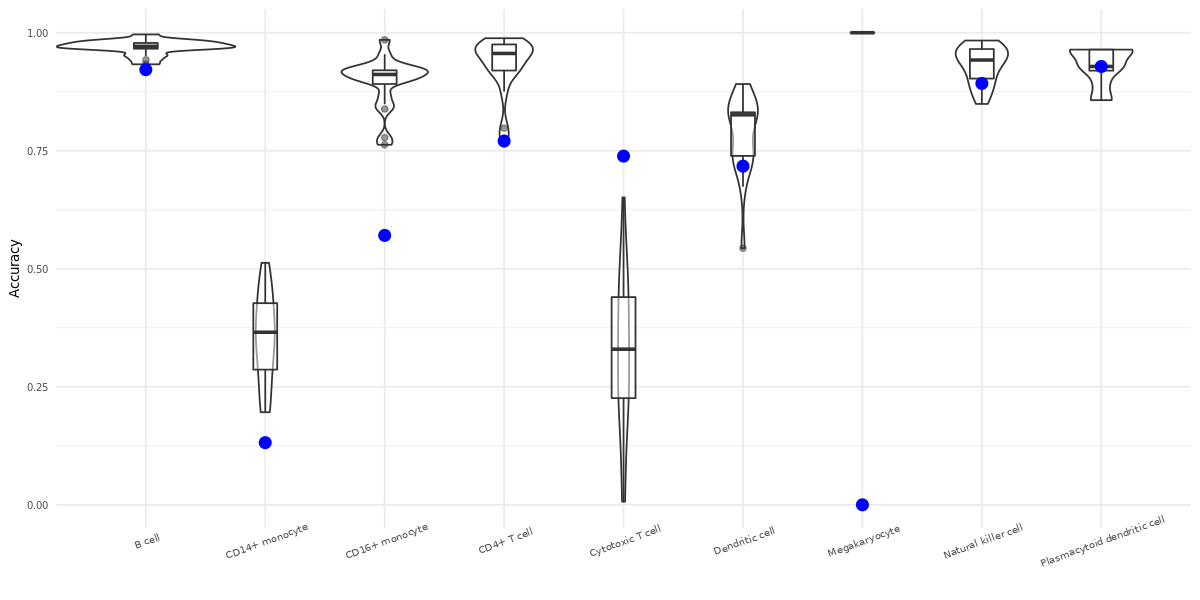

In [19]:
ggplot(seurat, aes(variable, value))+geom_violin(width=1.5)+theme_minimal() + geom_boxplot(width=0.2, alpha=0.5)+
geom_point(data = azimuth, aes(variable, accuracies), color="blue", size=3)+
        xlab(NULL) + ylab("Accuracy") + ylim(0,1) + 
        theme( axis.text.y=element_text(size=6), axis.title=element_text(size=8),
              axis.text.x=element_text(size=6, angle=20),
              legend.position = "bottom", legend.key.size = unit(0.5,"line")) 